In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

import requests

import time

from config import weather_api_key

from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

610

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | mount isa
Processing Record 4 of Set 1 | el faiyum
City not found. Skipping...
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | loa janan
Processing Record 11 of Set 1 | zyryanka
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | omboue
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | ayagoz
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing 

Processing Record 40 of Set 4 | nabire
Processing Record 41 of Set 4 | visby
Processing Record 42 of Set 4 | kaeo
Processing Record 43 of Set 4 | springbok
Processing Record 44 of Set 4 | martapura
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | houston
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | maneadero
Processing Record 49 of Set 4 | singaraja
Processing Record 50 of Set 4 | marienburg
Processing Record 1 of Set 5 | morehead
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | oregon
Processing Record 4 of Set 5 | zabol
Processing Record 5 of Set 5 | khasan
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | lephepe
City not found. Skipping...
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | ouesso
Processing Record 10 of Set 5 | dikson
Processing Record 11 of Set 5 | talnakh
Processing Record 12 of Set 5 | morinville
Processing Record 13 o

Processing Record 27 of Set 8 | muroto
Processing Record 28 of Set 8 | labuhan
Processing Record 29 of Set 8 | marsh harbour
Processing Record 30 of Set 8 | fort walton beach
Processing Record 31 of Set 8 | flagstaff
Processing Record 32 of Set 8 | nizhniy odes
Processing Record 33 of Set 8 | savignano sul rubicone
Processing Record 34 of Set 8 | arman
Processing Record 35 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 36 of Set 8 | fortuna
Processing Record 37 of Set 8 | amderma
City not found. Skipping...
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | goderich
Processing Record 40 of Set 8 | pemangkat
Processing Record 41 of Set 8 | tessalit
Processing Record 42 of Set 8 | hervey bay
Processing Record 43 of Set 8 | la uribe
City not found. Skipping...
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | zalishchyky
Processing Record 46 of Set 8 | werda
Processing Record 47 of Set 8 | mocuba
Processing Record 48

Processing Record 13 of Set 12 | tinskoy
Processing Record 14 of Set 12 | itaguai
Processing Record 15 of Set 12 | santarem
Processing Record 16 of Set 12 | lavrentiya
Processing Record 17 of Set 12 | kokopo
Processing Record 18 of Set 12 | makinsk
Processing Record 19 of Set 12 | saquarema
Processing Record 20 of Set 12 | olafsvik
Processing Record 21 of Set 12 | biak
Processing Record 22 of Set 12 | bloomington
Processing Record 23 of Set 12 | aranda de duero
Processing Record 24 of Set 12 | marawi
Processing Record 25 of Set 12 | hotaka
Processing Record 26 of Set 12 | bumba
Processing Record 27 of Set 12 | amapa
Processing Record 28 of Set 12 | benguela
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | belmonte
Processing Record 31 of Set 12 | saquena
Processing Record 32 of Set 12 | shakawe
Processing Record 33 of Set 12 | birjand
Processing Record 34 of Set 12 | belyy yar
Processing Record 35 of Set 12 | dmitriyev-lgovskiy
City not found. Skipping...
Proce

In [7]:
len(city_data)

556

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,87,75,35.68,AR,2022-05-08 14:05:21
1,Severo-Kurilsk,50.6789,156.1250,38.46,94,100,16.93,RU,2022-05-08 14:06:39
2,Mount Isa,-20.7333,139.5000,69.57,52,10,9.22,AU,2022-05-08 14:06:40
3,Airai,-8.9266,125.4092,59.83,92,47,3.94,TL,2022-05-08 14:05:22
4,Cockburn Town,21.4612,-71.1419,79.32,80,0,13.73,TC,2022-05-08 14:03:16
5,Kapaa,22.0752,-159.3190,73.72,86,100,14.97,US,2022-05-08 14:05:17
6,Pisco,-13.7000,-76.2167,66.25,82,51,5.75,PE,2022-05-08 14:05:09
7,Narsaq,60.9167,-46.0500,53.82,75,100,4.18,GL,2022-05-08 14:06:41
8,Loa Janan,-0.5830,117.0950,76.05,96,92,2.01,ID,2022-05-08 14:06:41
9,Zyryanka,65.7500,150.8500,27.50,85,37,8.99,RU,2022-05-08 14:06:42


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-08 14:05:21,-54.8000,-68.3000,40.66,87,75,35.68
1,Severo-Kurilsk,RU,2022-05-08 14:06:39,50.6789,156.1250,38.46,94,100,16.93
2,Mount Isa,AU,2022-05-08 14:06:40,-20.7333,139.5000,69.57,52,10,9.22
3,Airai,TL,2022-05-08 14:05:22,-8.9266,125.4092,59.83,92,47,3.94
4,Cockburn Town,TC,2022-05-08 14:03:16,21.4612,-71.1419,79.32,80,0,13.73
5,Kapaa,US,2022-05-08 14:05:17,22.0752,-159.3190,73.72,86,100,14.97
6,Pisco,PE,2022-05-08 14:05:09,-13.7000,-76.2167,66.25,82,51,5.75
7,Narsaq,GL,2022-05-08 14:06:41,60.9167,-46.0500,53.82,75,100,4.18
8,Loa Janan,ID,2022-05-08 14:06:41,-0.5830,117.0950,76.05,96,92,2.01
9,Zyryanka,RU,2022-05-08 14:06:42,65.7500,150.8500,27.50,85,37,8.99


In [11]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

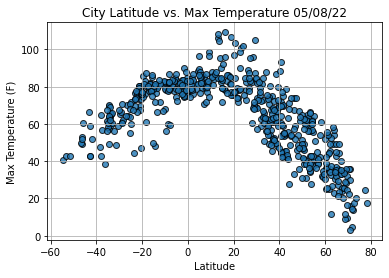

In [13]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

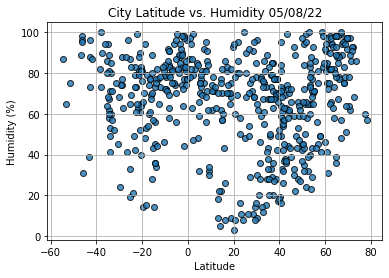

In [14]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

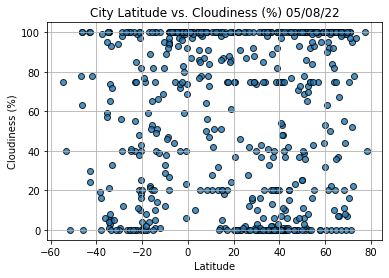

In [15]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

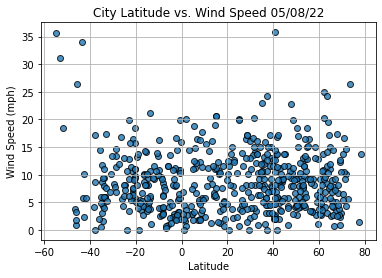

In [16]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [17]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

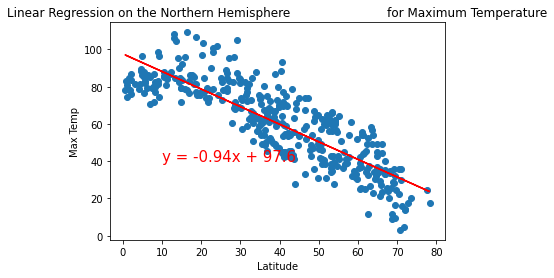

In [20]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

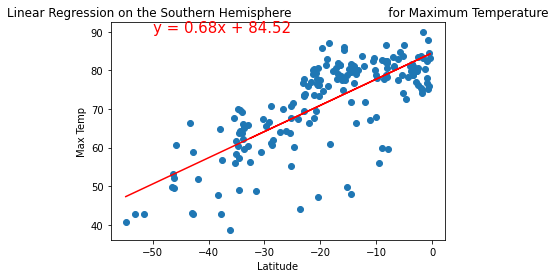

In [21]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

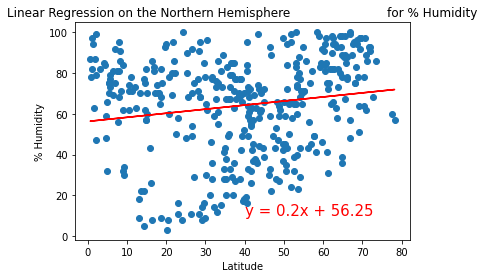

In [22]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

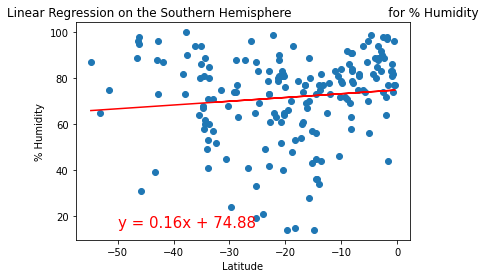

In [23]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

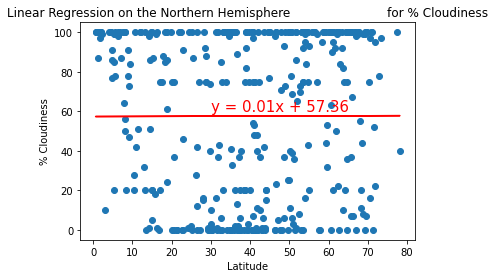

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,60))

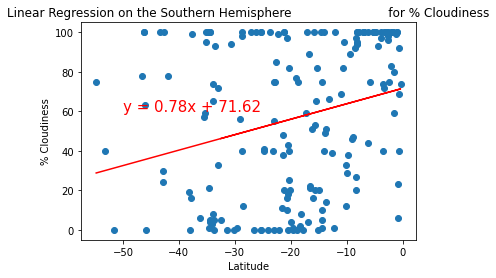

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

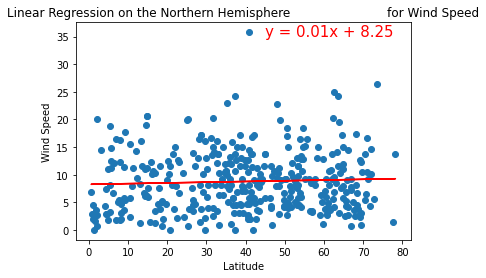

In [29]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,35))

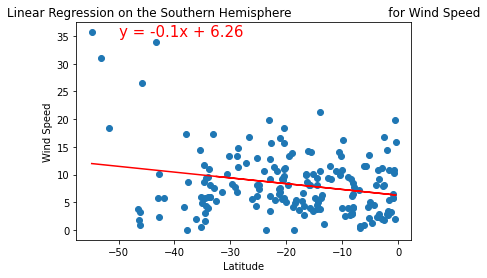

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))